<a href="https://colab.research.google.com/github/gmargonato/ML_Projects/blob/main/Student_Performance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#High-School Students Performance Dataset

Dataset: https://archive.ics.uci.edu/ml/datasets/student%2Bperformance

#Libraries and Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
#PANDAS PROFILING
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
#from pandas_profiling import ProfileReport

In [ ]:
#STATSMODELS
try: 
    import statsmodels.api as sm
except: 
    !pip install statsmodels --upgrade 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#PYCARET
try: 
    from pycaret.classification import *
except: 
    !pip install pycaret
    from pycaret.classification import *

#A RESTART RUNTIME CAN BE NECESSARY IS THIS STEP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Acquisition

In [ ]:
#Código para importar a base de dados de lingua portuguesa
df_pt = pd.read_csv('/content/drive/MyDrive/BASES_TCC/student-por.csv', sep=';')

#Código para importar a base de dados de matemática
df_mt = pd.read_csv('/content/drive/MyDrive/BASES_TCC/student-mat.csv', sep=';')

In [ ]:
#Define qual base de dados utilizaremos (PT ou MT)
df = df_pt

As variáveis categóricas de ambos datasets foram modelados em um esquema binário ou então por uma classificação de cinco níveis

**Principais Variáveis:**

* G1: Nota do primeiro período

* G2: Nota do segunda período

* G3: Nota do terceiro período, também é a nota final do aluno

**Variáveis Categóricas:**

* `school` - escola do estudante (GP: Gabriel Pereira; MS: Mouzinho da Silveira)
* `sex` - gênero do estudante
* `address` - endereço residencial do estudante (Urbano ou Rural)
* `reason` - motivo pelo qual escolheu a escola
* `Pstatus` - indica se ou pais do estudante moram juntos ou separados (T: Together; A: Apart)
* `famsize` - tamanho da família (maior ou menor do que 3 pessoas)
* `Mjob` - profissão da mãe
* `Fjob`- profissão do pai
* `guardian`- indica quem é o guardião legal do aluno
* `schoolsup` - recebe ou não suporte escolar
* `famsup` - recebe ou não suporte familiar
* `paid` - indica se o aluno faz aulas particulares daquela matéria
* `activities` - indica se o aluno faz atividades extracurriculares
* `nursery`- indica se o aluno fez aulas de enfermagem
* `internet`- indica se o aluno tem acesso ou não à internet
* `higher ` - indica se o aluno deseja fazer faculdade ou não 
* `romantic` - indica se o aluno está namorando ou não


In [ ]:
#Vamos criar uma nova coluna Media que será a média entre G1, G2 and G3.
df['media']= round((df['G1']+df['G2']+df['G3'])/3, 2)

#Depois, vamos criar uma nova coluna Aprovado dependendo da média das notas.
df['aprovado'] = np.where(df['media'] >= 10, 1, 0)

In [ ]:
#Observar as 5 primeiras linhas da tabela
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,media,aprovado
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,7.33,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.33,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.33,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.00,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.33,1


In [ ]:
#Observar as 5 últimas linhas da tabela
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,media,aprovado
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,10.33,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,15.33,1
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,10.67,1
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,10.00,1
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11,10.67,1


In [ ]:
#número de linhas e colunas
df.shape

(649, 35)

#Data Exploration

In [ ]:
#Tipagem das colunas e quantidade de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    int64  
 7   Fedu        649 non-null    int64  
 8   Mjob        649 non-null    object 
 9   Fjob        649 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    int64  
 13  studytime   649 non-null    int64  
 14  failures    649 non-null    int64  
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

In [ ]:
#Estatísiticas das colunas tipo numérico
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,media,aprovado
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,11.625116,0.758089
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,2.833308,0.428571
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.330000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,10.000000,1.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.670000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.330000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.670000,1.000000


##Tabelas de Frequência

In [ ]:
#método que recebe um dataframe e o nome de uma variavel categorica, e retorna um data frame

def tbl_freq(dtframe,variavel):

    freq_variavel = pd.DataFrame(
        pd.concat([
            dtframe[variavel].value_counts(),              
            dtframe[variavel].value_counts(normalize=True).mul(1).round(4),
            dtframe[variavel].value_counts(normalize=True).mul(100).round(),
        ],axis=1,keys=('Absoluta','Relativa','%'))
    )

    return freq_variavel

In [ ]:
print("Tabela 1. Frequência de distribuição das escolas")
tbl_freq(df,"school")

Tabela 1. Frequência de distribuição das escolas


,Absoluta,Relativa,%
GP,423,0.6518,65.0
MS,226,0.3482,35.0


In [ ]:
print("Tabela 2. Frequência de distribuição de gênero")
tbl_freq(df,"sex")

Tabela 2. Frequência de distribuição de gênero


,Absoluta,Relativa,%
F,383,0.5901,59.0
M,266,0.4099,41.0


In [ ]:
print("Tabela 3. Frequência de distribuição da residência")
tbl_freq(df,"address")

Tabela 3. Frequência de distribuição da residência


,Absoluta,Relativa,%
U,452,0.6965,70.0
R,197,0.3035,30.0


In [ ]:
print("Tabela 4. Frequência do motivo pelo qual escolheu a escola")
tbl_freq(df,"reason")

Tabela 4. Frequência do motivo pelo qual escolheu a escola


,Absoluta,Relativa,%
course,285,0.4391,44.0
home,149,0.2296,23.0
reputation,143,0.2203,22.0
other,72,0.1109,11.0


In [ ]:
print("Tabela 5. Frequência da distribuição de status parental (casados/together, separdos/alone)")
tbl_freq(df,"Pstatus")

Tabela 5. Frequência da distribuição de status parental (casados/together, separdos/alone)


,Absoluta,Relativa,%
T,569,0.8767,88.0
A,80,0.1233,12.0


In [ ]:
print("Tabela 6. Frequência do tamanho da família (maior ou menor que 3 indivíduos)")
tbl_freq(df,"famsize")

Tabela 6. Frequência do tamanho da família (maior ou menor que 3 indivíduos)


,Absoluta,Relativa,%
GT3,457,0.7042,70.0
LE3,192,0.2958,30.0


In [ ]:
print("Tabela 7. Frequência de distribuição da profissão do pai")
tbl_freq(df,"Fjob")

Tabela 7. Frequência de distribuição da profissão do pai


,Absoluta,Relativa,%
other,367,0.5655,57.0
services,181,0.2789,28.0
at_home,42,0.0647,6.0
teacher,36,0.0555,6.0
health,23,0.0354,4.0


In [ ]:
print("Tabela 8. Frequência de distribuição da profissão da mãe")
tbl_freq(df,"Mjob")

Tabela 8. Frequência de distribuição da profissão da mãe


,Absoluta,Relativa,%
other,258,0.3975,40.0
services,136,0.2096,21.0
at_home,135,0.2080,21.0
teacher,72,0.1109,11.0
health,48,0.0740,7.0


In [ ]:
print("Tabela 9. Frequência de distribuição se o aluno recebe apoio aos estudos da escola")
tbl_freq(df,"schoolsup")

Tabela 9. Frequência de distribuição se o aluno recebe apoio aos estudos da escola


,Absoluta,Relativa,%
no,581,0.8952,90.0
yes,68,0.1048,10.0


In [ ]:
print("Tabela 10. Frequência de distribuição se o aluno recebe apoio aos estudos da família")
tbl_freq(df,"famsup")

Tabela 10. Frequência de distribuição se o aluno recebe apoio aos estudos da família


,Absoluta,Relativa,%
yes,398,0.6133,61.0
no,251,0.3867,39.0


In [ ]:
print("Tabela 11. Frequência de distribuição se o aluno faz aulas particulares da matéria (Ex: Kumon)")
tbl_freq(df,"paid")

Tabela 11. Frequência de distribuição se o aluno faz aulas particulares da matéria (Ex: Kumon)


,Absoluta,Relativa,%
no,610,0.9399,94.0
yes,39,0.0601,6.0


In [ ]:
print("Tabela 12. Frequência se o aluno tem atividades extra-escola")
tbl_freq(df,"activities")

Tabela 12. Frequência se o aluno tem atividades extra-escola


,Absoluta,Relativa,%
no,334,0.5146,51.0
yes,315,0.4854,49.0


In [ ]:
print("Tabela 13. Frequência se o aluno faz aulas de enfermagem")
tbl_freq(df,"nursery")

Tabela 13. Frequência se o aluno faz aulas de enfermagem


,Absoluta,Relativa,%
yes,521,0.8028,80.0
no,128,0.1972,20.0


In [ ]:
print("Tabela 14. Frequência de distribuição se o aluno tem acesso à internet em casa")
tbl_freq(df,"internet")

Tabela 14. Frequência de distribuição se o aluno tem acesso à internet em casa


,Absoluta,Relativa,%
yes,498,0.7673,77.0
no,151,0.2327,23.0


In [ ]:
print("Tabela 15. Frequência de interesse do aluno em cursar ensino superior")
tbl_freq(df,"higher")

Tabela 15. Frequência de interesse do aluno em cursar ensino superior


,Absoluta,Relativa,%
yes,580,0.8937,89.0
no,69,0.1063,11.0


In [ ]:
print("Tabela 16. Frequência de distribuição se o aluno está em um relacionamento romântico")
tbl_freq(df,"romantic")

Tabela 16. Frequência de distribuição se o aluno está em um relacionamento romântico


,Absoluta,Relativa,%
no,410,0.6317,63.0
yes,239,0.3683,37.0


In [ ]:
print("Tabela 17. Frequência de distribuição do guardião legal do aluno")
tbl_freq(df,"guardian")

Tabela 17. Frequência de distribuição do guardião legal do aluno


,Absoluta,Relativa,%
mother,455,0.7011,70.0
father,153,0.2357,24.0
other,41,0.0632,6.0


##Análise dos Dados Demográficos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


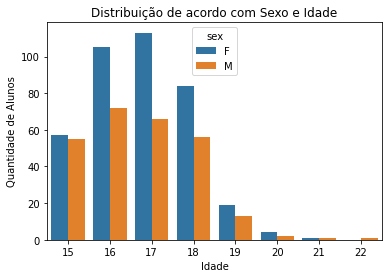

In [ ]:
#Análise entre idade e sexo
ax = sns.countplot('age',hue='sex', data=df)
ax.set_title('Distribuição de acordo com Sexo e Idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Quantidade de Alunos')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; yo

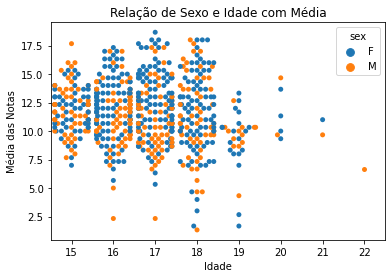

In [ ]:
#Análise entre idade, sexo e média
ax = sns.swarmplot(x='age', y='media',hue='sex', data=df)
ax.set_title('Relação de Sexo e Idade com Média')
ax.set_xlabel('Idade')
ax.set_ylabel('Média das Notas')
plt.show()

A maioria dos estudantes está entre 15 e 18 anos, com um número levemente maior de meninas.

Idade e sexo não parecem ter uma influência clara nas médias das notas.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; yo

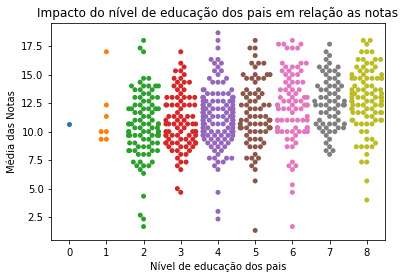

In [ ]:
#Impacto do grau de instrução dos pais (mãe + pai) no impacto da nota dos alunos
Pedu = df['Fedu'] + df['Medu'] 
ax = sns.swarmplot(x=Pedu,y=df['media'])
ax.set_title('Impacto do nível de educação dos pais em relação as notas')
ax.set_xlabel('Nível de educação dos pais')
ax.set_ylabel('Média das Notas')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


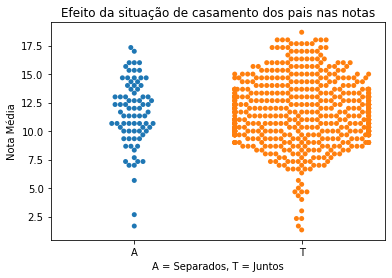

In [ ]:
#Análise se os pais casados ou separados tem impacto nas notas dos alunos
ax = sns.swarmplot(x=df['Pstatus'],y=df['media'])
ax.set_title('Efeito da situação de casamento dos pais nas notas')
ax.set_xlabel('A = Separados, T = Juntos')
ax.set_ylabel('Nota Média')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


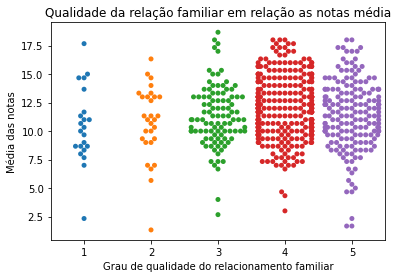

In [ ]:
#Qualidade da relação familiar
ax = sns.swarmplot(x=df['famrel'], y=df['media'])
ax.set_title('Qualidade da relação familiar em relação as notas média')
ax.set_xlabel('Grau de qualidade do relacionamento familiar')
ax.set_ylabel('Média das notas')
plt.show()

A maioria das famílias tem 3 membros ou mais, porém isso não parece ter efeito nas notas dos alunos.

Podemos notar notas ligeiramente maiores quando o nível de educação dos pais é maior também.

Analisando em conjunto os gráficos acima, podemos notar que grande parte dos estudantes moram com ambos os pais, e que eles tem um bom relacionament familiar. Contudo, isso não parece afetar as notas deles.

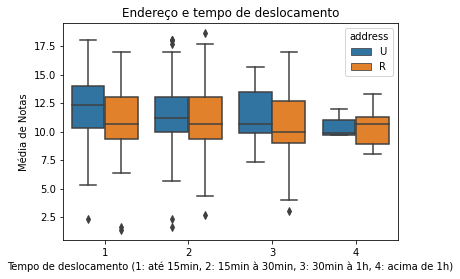

In [ ]:
#Análise do deslocamento dos estudantes
ax = sns.boxplot(x='traveltime', y='media',hue='address', data=df)
ax.set_title('Endereço e tempo de deslocamento')
ax.set_xlabel('Tempo de deslocamento (1: até 15min, 2: 15min à 30min, 3: 30min à 1h, 4: acima de 1h)')
ax.set_ylabel('Média de Notas')
plt.show()

Estudantes que moram a mais de uma hora de distância da escola tem média menor que os demais.

Estudantes que moram na zona urbana tem uma nota média maior em relação aos que moram na zona rural.

##Análise dos Dados de Performance

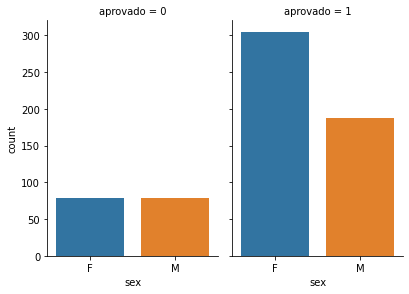

In [ ]:
g = sns.catplot(x="sex", col="aprovado",
                 data=df, kind="count",
                 height=4, aspect=.7);

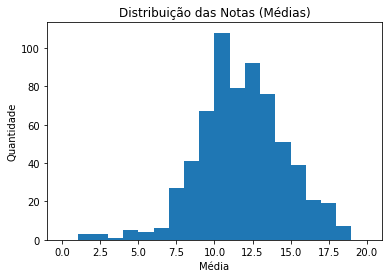

In [ ]:
#Análise da distribuição de notas médias dos estudantes
plt.hist(df['media'], bins=20, range=[0,20])
plt.title('Distribuição das Notas (Médias)')
plt.xlabel('Média')
plt.ylabel('Quantidade')
plt.show()

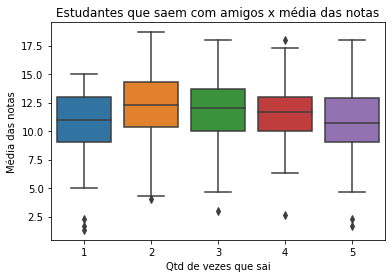

In [ ]:
#Análise entre a frequência que o aluno sai com os amigos e notas médias
ax = sns.boxplot(x=df['goout'],y=df['media'])
ax.set_title('Estudantes que saem com amigos x média das notas')
ax.set_xlabel('Qtd de vezes que sai')
ax.set_ylabel('Média das notas')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


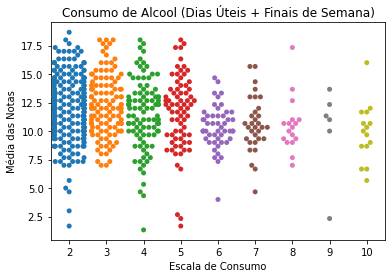

In [ ]:
#Análise do consumo de álcool

#Vamos juntar as colunas "dalc" e "walc", 
#que representam consumo de álcool durante a semana e aos finais de semana, respectivamente
alc = df['Dalc'] + df['Walc'] 

#Plot do Gráfico
ax = sns.swarmplot(x=alc,y=df['media'])
ax.set_title('Consumo de Alcool (Dias Úteis + Finais de Semana)')
ax.set_xlabel('Escala de Consumo')
ax.set_ylabel('Média das Notas')
plt.show()

Não parece haver uma correlação entre a quantidade de vezes que o aluno sai, com suas as médias - uma vez que os extremos tem medianas semelhantes.

O consumo exagerado de álcool (grau 6 em diante) resulta em notas médias menores.

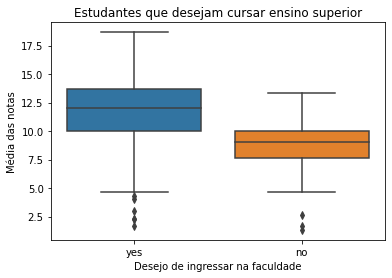

In [ ]:
#Análise se o desejo de ingressar na faculdade tem impacto nas notas
ax= sns.boxplot(x=df['higher'],y=df['media'])
ax.set_title('Estudantes que desejam cursar ensino superior')
ax.set_xlabel('Desejo de ingressar na faculdade')
ax.set_ylabel('Média das notas')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


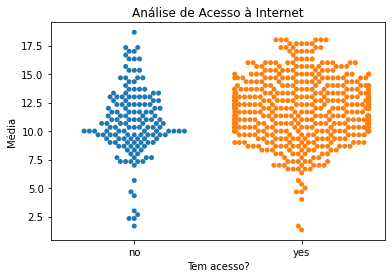

In [ ]:
ax= sns.swarmplot(x=df['internet'],y=df['media'])
ax.set_title('Análise de Acesso à Internet')
ax.set_xlabel('Tem acesso?')
ax.set_ylabel('Média')
plt.show()

#ax= sns.boxplot(x=df['internet'],y=df['media'])
#ax.set_title('Análise de Acesso à Internet')
#ax.set_xlabel('Tem acesso?')
#ax.set_ylabel('Média das notas')
#plt.show()

Estudantes que desejam ingressar na universidade tem notas médias consideravelmente maiores.

Há mais alunos com acesso à internet, contudo parece não haver um impacto alto nas médias das notas. 

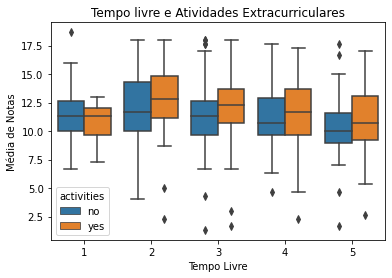

In [ ]:
#Impacto do tempo livre x atividades em relação à média
b = sns.boxplot(x=df['freetime'], hue=df['activities'], y=df['media'])
b.set_title('Tempo livre e Atividades Extracurriculares')
b.set_xlabel('Tempo Livre')
b.set_ylabel('Média de Notas')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


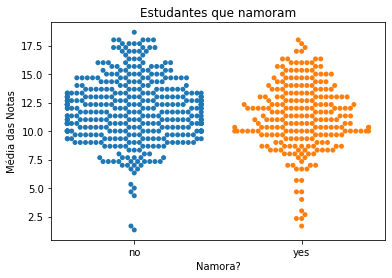

In [ ]:
#Impacto dos relacionamentos românticos
ax = sns.swarmplot(x=df['romantic'],y=df['media'])
ax.set_title('Estudantes que namoram')
ax.set_xlabel('Namora?')
ax.set_ylabel('Média das Notas')
plt.show()

Tempo livre e atividades extracurriculares não tem grande impacto impacto nas médias.

Estudantes que namoram tem médias ligeramente menores do que aqueles que não namoram.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; yo

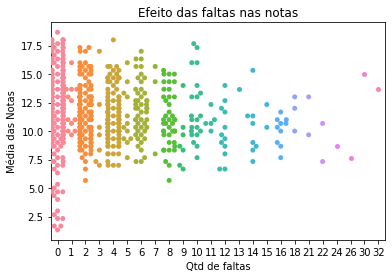

In [ ]:
#Faltas
ax= sns.swarmplot(x=df['absences'],y=df['media'])
ax.set_title('Efeito das faltas nas notas')
ax.set_xlabel('Qtd de faltas')
ax.set_ylabel('Média das Notas')
plt.show()

Em geral, há uma tendência de que quanto mais o aluno falta, menores são suas médias.

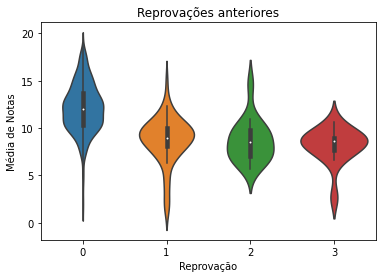

In [ ]:
#Análise do aluno repetente
ax = sns.violinplot(x=df['failures'],y=df['media'])
ax.set_title('Reprovações anteriores')
ax.set_xlabel('Reprovação')
ax.set_ylabel('Média de Notas')
plt.show()

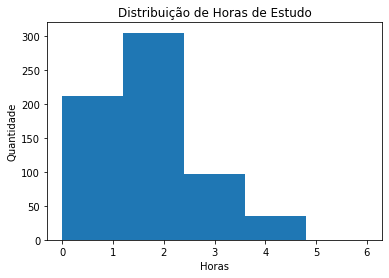

In [ ]:
#Análise da distribuição de horas de estudo
plt.hist(df['studytime'], bins=5, range=[0,6])
plt.title('Distribuição de Horas de Estudo')
plt.xlabel('Horas')
plt.ylabel('Quantidade')
plt.show()

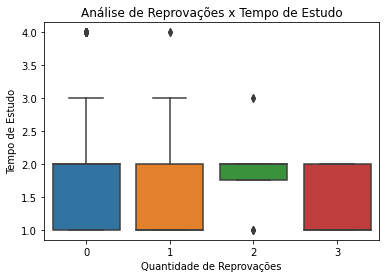

In [ ]:
ax= sns.boxplot(x=df['failures'],y=df['studytime'])
ax.set_title('Análise de Reprovações x Tempo de Estudo')
ax.set_xlabel('Quantidade de Reprovações')
ax.set_ylabel('Tempo de Estudo')
plt.show()

Em geral, os alunos estudam de 1 a 2 horas por dia.

Alunos que estudam mais horas por dia tendem a reprovar menos.

#MODELAGEM COM ESTATÍSTICA TRADICIONAL

In [ ]:
#one-hot encoding nas variaveis categoricas

df_ohe = pd.get_dummies(df, columns = 
[
    'sex',
    'school',
    'address',
    'famsize',
    'Pstatus',
    'Mjob',
    'Fjob',
    'reason',
    'guardian',
    'schoolsup',
    'famsup',
    'paid',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic'
])
df_ohe.head(1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,media,aprovado,sex_F,sex_M,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,7.33,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0


In [ ]:
#Função que retorna as variáveis mais significativas dado um modelo e um p-valor
def filtro_pvalor(resultados,valor):
    stat_df = pd.DataFrame({'coefficients':resultados.params, 
                            'p-value': resultados.pvalues, 
                            'odds_ratio': np.exp(resultados.params)
                            })

    significant_params = stat_df[stat_df['p-value']<=valor].index
    return significant_params

##Regressão Linear SIMPLES

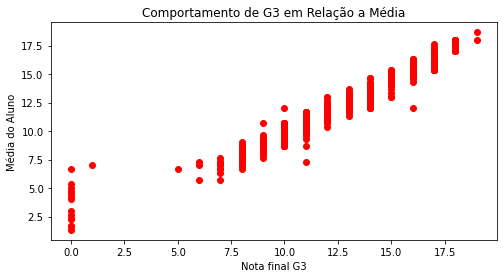

In [ ]:
#Comportamento da média em relação a G3
plt.figure(figsize = (8,4))
plt.scatter(
    df['G3'],
    df['media'], 
    c='red')
plt.title('Comportamento de G3 em Relação a Média')
plt.xlabel("Nota final G3")
plt.ylabel("Média do Aluno")
plt.show()

In [ ]:
#Cálculo da equação do modelo

X_RLS = df['G3'].values.reshape(-1,1)
y_RLS = df['media'].values.reshape(-1,1)

X_RLS = sm.add_constant(X_RLS)
reg_sim = sm.OLS(y_RLS, X_RLS)
resultado_RLS = reg_sim.fit()

print("A equação do modelo é = {:.5} + ({:.5} * X)".format(resultado_RLS.params[0], resultado_RLS.params[1]))

A equação do modelo é = 1.5821 + (0.84353 * X)


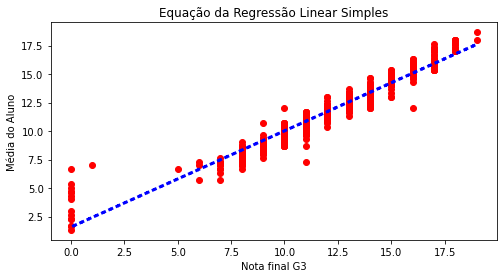

In [ ]:
predict_RLS = resultado_RLS.predict(X_RLS)

plt.figure(figsize = (8,4))
plt.scatter(
    df['G3'], 
    df['media'], 
    c='red')

plt.plot(
    df['G3'],
    predict_RLS,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.title('Equação da Regressão Linear Simples')
plt.xlabel("Nota final G3")
plt.ylabel("Média do Aluno")
plt.show()

In [ ]:
#Avaliação do modelo
X_RLS = df['G3']
y_RLS = df['media']

X_RLS = sm.add_constant(X_RLS)
modelo_RLS = sm.OLS(y_RLS, X_RLS)
resultado_RLS = modelo_RLS.fit()
print(resultado_RLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     7992.
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:48:45   Log-Likelihood:                -755.28
No. Observations:                 649   AIC:                             1515.
Df Residuals:                     647   BIC:                             1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5821      0.116     13.592      0.0

In [ ]:
y_pred_RLS = resultado_RLS.predict(X_RLS)

MAE = metrics.mean_absolute_error(y_RLS, y_pred_RLS)
RMSE = np.sqrt(metrics.mean_squared_error(y_RLS, y_pred_RLS))

print("RMSE:",round(RMSE,2))
print("MAE: ",round(MAE,2))

RMSE: 0.77
MAE:  0.55


**Teste de Hipóteses**

* Hipótese Nula: Não existe relação entre G3 e Média
* Hipótese Alternativa: Existe relação entre G3 e Média

Quando analisamos o `p-valor` observamos que está abaixo de 0.05, o que nos faz rejeitar a hipótese nula e **aceitar a hipótese alternativa**.

Podemos observar que R2 = 0.925, ou seja, aproximadamente 92% do comportamento da variável `media` é explicado pela variável `G3`.

##Regressão Linear MÚLTIPLA

Pela **regressão linear múltipla**, tentaremos prever a variável target `media` baseado nas variáveis com maior correlação encontradas na análise exploratória dos dados e também na análise do p-valor.

**Teste de hipóteses**
* Hipótese Nula: A variável não afeta a média das notas.
* Hipótese Alternativa: A variável afeta a média das notas.

Portanto, se a coluna mostrar um p-valor <= 0,05 rejeitaremos a hipótese nula e diremos que a variável afeta sim a média.

In [ ]:
#não utilizaremos a variável aprovado para a regressão linear múltipla
df_RLM = df_ohe.drop('aprovado', 1)

In [ ]:
#vamos dropar a variavel target 'media'
#e também as variáveis com multicolinearidade: 'G1' e 'G2'

#variaveis independentes
X_RLM = df_RLM.drop(['media','G1','G2'], 1)

#variavel dependente
y_RLM = df_RLM['media']

#modelagem com StatsModels
X_RLM = sm.add_constant(X_RLM)
modelo_RLM = sm.OLS(y_RLM,X_RLM)
resultados_RLM = modelo_RLM.fit()
print(resultados_RLM.summary())

                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.2
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:48:45   Log-Likelihood:                -719.84
No. Observations:                 649   AIC:                             1522.
Df Residuals:                     608   BIC:                             1705.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2625      0.06

Vamos utilizar um intervalo de confiança de 50%, ou seja, manteremos apenas as variáveis com p-valor abaixo de 0.5

In [ ]:
filtro_pvalor(resultados_RLM,0.5)

Index(['const', 'age', 'Medu', 'traveltime', 'studytime', 'health', 'absences',
       'G3', 'sex_F', 'sex_M', 'school_GP', 'school_MS', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_other', 'Fjob_at_home', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no',
       'paid_yes', 'activities_no', 'activities_yes', 'nursery_no',
       'nursery_yes', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no', 'romantic_yes'],
      dtype='object')

In [ ]:
#Refinamento do modelo
X_RLM = df_RLM[
    ['age', 'Medu', 'traveltime', 'studytime', 'health', 'absences',
       'G3', 'sex_F', 'sex_M', 'school_GP', 'school_MS', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_other', 'Fjob_at_home', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no',
       'paid_yes', 'activities_no', 'activities_yes', 'nursery_no',
       'nursery_yes', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no', 'romantic_yes'
    ]
]

X_RLM = sm.add_constant(X_RLM)
modelo_RLM = sm.OLS(y_RLM,X_RLM)
resultados_RLM = modelo_RLM.fit()
print(resultados_RLM.summary())

                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     285.6
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:48:45   Log-Likelihood:                -720.49
No. Observations:                 649   AIC:                             1503.
Df Residuals:                     618   BIC:                             1642.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2849      0.08

In [ ]:
filtro_pvalor(resultados_RLM,0.1)

Index(['const', 'Medu', 'traveltime', 'absences', 'G3', 'sex_F', 'sex_M',
       'school_GP', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_T', 'reason_other', 'reason_reputation', 'schoolsup_no',
       'famsup_no', 'famsup_yes', 'paid_no', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'internet_no', 'internet_yes',
       'romantic_no', 'romantic_yes'],
      dtype='object')

In [ ]:
#Refinamento do modelo
X_RLM = df_RLM[
    ['age', 'Medu', 'traveltime', 'absences', 'G3', 'sex_F',
       'sex_M', 'school_GP', 'school_MS', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_other',
       'Fjob_teacher', 'reason_other', 'schoolsup_no', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'
    ]
]

X_RLM = sm.add_constant(X_RLM)
modelo_RLM = sm.OLS(y_RLM,X_RLM)
resultados_RLM = modelo_RLM.fit()
print(resultados_RLM.summary())

                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     404.8
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:48:45   Log-Likelihood:                -727.21
No. Observations:                 649   AIC:                             1498.
Df Residuals:                     627   BIC:                             1597.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3439      0.076      4.

In [ ]:
filtro_pvalor(resultados_RLM,0.05)

Index(['const', 'Medu', 'absences', 'G3', 'sex_F', 'sex_M', 'school_GP',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_T',
       'famsup_no', 'famsup_yes', 'paid_no', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [ ]:
#Refinamento do modelo
X_RLM = df_RLM[
    ['Medu', 'absences', 'G3', 'sex_F', 'sex_M', 'school_GP',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_T',
       'famsup_no', 'famsup_yes', 'paid_no', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'
    ]
]

X_RLM = sm.add_constant(X_RLM)
modelo_RLM = sm.OLS(y_RLM,X_RLM)
resultados_RLM = modelo_RLM.fit()
print(resultados_RLM.summary())

                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     556.0
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:48:45   Log-Likelihood:                -735.88
No. Observations:                 649   AIC:                             1504.
Df Residuals:                     633   BIC:                             1575.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2601      0.041      6.

In [ ]:
filtro_pvalor(resultados_RLM,0.05)

Index(['const', 'Medu', 'absences', 'G3', 'sex_F', 'sex_M', 'school_GP',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'famsup_no',
       'famsup_yes', 'activities_no', 'activities_yes', 'nursery_no',
       'nursery_yes', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no', 'romantic_yes'],
      dtype='object')

In [ ]:
#Refinamento do modelo
X_RLM = df_RLM[
    ['Medu', 'Medu', 'absences', 'G3', 'sex_F', 'sex_M', 'school_GP',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'famsup_no',
       'famsup_yes', 'activities_no', 'activities_yes', 'nursery_no',
       'nursery_yes', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no', 'romantic_yes'
    ]
]

X_RLM = sm.add_constant(X_RLM)
modelo_RLM = sm.OLS(y_RLM,X_RLM)
resultados_RLM = modelo_RLM.fit()
print(resultados_RLM.summary())

                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     642.2
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:48:45   Log-Likelihood:                -736.50
No. Observations:                 649   AIC:                             1501.
Df Residuals:                     635   BIC:                             1564.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2900      0.028     10.

Finalização de refinamento do modelo.

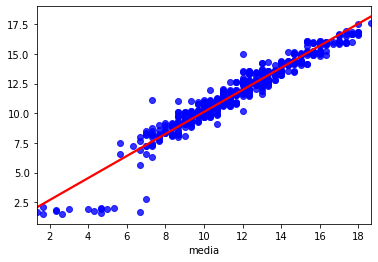

In [ ]:
y_pred_RLM = resultados_RLM.predict(X_RLM)

sns.regplot(
    x=df["media"], 
    y=y_pred_RLM, 
    ci=None, 
    scatter_kws={"color": "blue"}, line_kws={"color": "red"}
    )

In [ ]:
MAE = metrics.mean_absolute_error(y_RLM, y_pred_RLM)
RMSE = np.sqrt(metrics.mean_squared_error(y_RLM, y_pred_RLM))

print("RMSE:",round(RMSE,2))
print("MAE: ",round(MAE,2))

RMSE: 0.75
MAE:  0.54


##Regressão LOGÍSTICA (statsmodels)

Variável target: `aprovado` (1 ou 0)

In [ ]:
#não utilizaremos a variável media para a regressão logistica
df_RL = df_ohe.drop('media', 1)

X_RL = df_RL.drop(['aprovado','G1','G2'], 1)
X_RL = sm.add_constant(X_RL)
y_RL = df_RL['aprovado']

#separacao em treino e teste
X_train_RL, X_test_RL, y_train_RL, y_test_RL = train_test_split(X_RL, y_RL, test_size=0.2, random_state=0)

#treinamento do modelo com Logit
modelo_RL = sm.Logit(y_train_RL,X_train_RL,random_state=0).fit_regularized()#.fit()
print(modelo_RL.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.09168536111628672
            Iterations: 259
            Function evaluations: 262
            Gradient evaluations: 259
                           Logit Regression Results                           
Dep. Variable:               aprovado   No. Observations:                  519
Model:                          Logit   Df Residuals:                      461
Method:                           MLE   Df Model:                           57
Date:                Mon, 06 Sep 2021   Pseudo R-squ.:                  0.8389
Time:                        12:48:47   Log-Likelihood:                -47.585
converged:                       True   LL-Null:                       -295.37
Covariance Type:            nonrobust   LLR p-value:                 3.297e-71
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [ ]:
melhores_parametros = filtro_pvalor(modelo_RL,0.9)
print('Total de parâmetros: %s '%len(X_RL.keys()))
print('Parâmetros significantes: %s'%(len(melhores_parametros)))
print(melhores_parametros)

Total de parâmetros: 58 
Parâmetros significantes: 13
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3'],
      dtype='object')


Refinamento do modelo com os melhores parâmetros

In [ ]:
#Refinamento do modelo
X_RL = df_RL[
    [
     'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
     'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3'
    ]
]
X_RL = sm.add_constant(X_RL)

#separacao em treino e teste
X_train_RL, X_test_RL, y_train_RL, y_test_RL = train_test_split(X_RL, y_RL, test_size=0.2, random_state=0)

#treinamento do modelo com Logit
modelo_RL = sm.Logit(y_train_RL,X_train_RL,random_state=0).fit_regularized()#.fit()
print(modelo_RL.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.12194145820448996
            Iterations: 83
            Function evaluations: 87
            Gradient evaluations: 83
                           Logit Regression Results                           
Dep. Variable:               aprovado   No. Observations:                  519
Model:                          Logit   Df Residuals:                      505
Method:                           MLE   Df Model:                           13
Date:                Mon, 06 Sep 2021   Pseudo R-squ.:                  0.7857
Time:                        12:48:47   Log-Likelihood:                -63.288
converged:                       True   LL-Null:                       -295.37
Covariance Type:            nonrobust   LLR p-value:                 5.898e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
y_pred_RL = modelo_RL.predict(X_test_RL)

#converter y em binario. Utilizaremos um threshold de 0.5
y_pred_RL = np.where(y_pred_RL > 0.5,1,0)

#Metricas de análise de erro residual
MAE = metrics.mean_absolute_error(y_test_RL, y_pred_RL)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_RL, y_pred_RL))

print("RMSE:",round(RMSE,2))
print("MAE: ",round(MAE,2))

RMSE: 0.26
MAE:  0.07


Text(33.0, 0.5, 'Valores Reais')

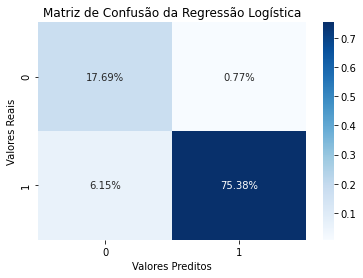

In [ ]:
#Matriz de confusão
mc_RL = confusion_matrix(y_test_RL,y_pred_RL)
ax=sns.heatmap(mc_RL/np.sum(mc_RL), annot=True, fmt='.2%', cmap='Blues')
plt.title("Matriz de Confusão da Regressão Logística")
plt.xlabel('Valores Preditos', fontsize=10)
plt.ylabel('Valores Reais', fontsize=10)

In [ ]:
TP = mc_RL[1][1]
TN = mc_RL[0][0]
FP = mc_RL[0][1]
FN = mc_RL[1][0]

print('Verdadeiro Positivo (TP): previu', TP,"aprovados corretamente")
print('Verdadeiro Negativo (VN): previu', TN,"não-aprovados corretamente")
print('Falso Positivo      (FP): previu', FP,"aprovado incorretamente")
print('Falso Negativo      (FN): previu', FN,"não-aprovado incorretamente")

Verdadeiro Positivo (TP): previu 98 aprovados corretamente
Verdadeiro Negativo (VN): previu 23 não-aprovados corretamente
Falso Positivo      (FP): previu 1 aprovado incorretamente
Falso Negativo      (FN): previu 8 não-aprovado incorretamente


In [ ]:
#Cálculo da Especificidade - O quão bom é o modelo em evitar falsos positivos?
especificidade = TN / (TN + FP)
print("Especificidade: ",round(especificidade*100),"%")

#Cálculo da Sensibilidade/Recall - Com qual frequência o modelo encontrou positivos?
sensibilidade = TP / (TP + FN)
print("Sensibilidade: ",round(sensibilidade*100),"%")

#Cálculo da Acurácia - Quantas instâncias o modelo classificou corretamente?
acuracia = (TP+TN) / (TP+FP+TN+FN)
print("Acurácia: ",round(acuracia*100),"%")

Especificidade:  96 %
Sensibilidade:  92 %
Acurácia:  93 %


#MODELAGEM COM MACHINE LEARNING

##PyCaret

In [ ]:
#variáveis que utilizaremos com base na análise exploratória
df_PC = df[
    ['age',
    'Medu',
    'Fedu',
    'studytime',
    'traveltime',
    'failures',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health',
    'absences',
    'G3',
    'aprovado']           
]

In [ ]:
#divisão entre treino e teste
df_train_PC, df_test_PC = train_test_split(df_PC, test_size=0.2)

#configuração inicial pycaret - utilizaremos a variável target 'aprovado' 

clf = setup(
    data = df_train_PC
    ,test_data = df_test_PC
    ,target = 'aprovado'
    ,silent = True
    ,normalize = True
    #,transformation = True
    #,feature_selection = True
    #,feature_interaction = True
    #,feature_ratio = True
    ,remove_multicollinearity = True
    ,multicollinearity_threshold = 0.6
    #,ignore_low_variance = True
)

In [ ]:
# retorna os melhores modelos que foram treinados
models = compare_models(
    errors = "raise"
    ,sort = "AUC"
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9172,0.9636,0.9263,0.9634,0.9440,0.7837,0.7880,0.025
gbc,Gradient Boosting Classifier,0.9076,0.9632,0.9416,0.9381,0.9395,0.7433,0.7458,0.133
nb,Naive Bayes,0.7747,0.9627,0.7080,0.9926,0.8253,0.5323,0.5968,0.020
lr,Logistic Regression,0.9095,0.9624,0.9466,0.9364,0.9410,0.7453,0.7492,0.345
et,Extra Trees Classifier,0.9075,0.9603,0.9466,0.9332,0.9395,0.7426,0.7455,0.474
ada,Ada Boost Classifier,0.9057,0.9581,0.9466,0.9318,0.9385,0.7345,0.7396,0.129
rf,Random Forest Classifier,0.9056,0.9568,0.9517,0.9268,0.9388,0.7317,0.7348,0.525
lightgbm,Light Gradient Boosting Machine,0.8863,0.9333,0.9491,0.9070,0.9270,0.6696,0.6780,0.095
qda,Quadratic Discriminant Analysis,0.8342,0.8321,0.8378,0.9407,0.8838,0.5949,0.6137,0.028
dt,Decision Tree Classifier,0.8767,0.8299,0.9213,0.9171,0.9188,0.6625,0.6648,0.021


In [ ]:
#cria o melhor modelo
best_model = create_model(models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9423,0.9750,0.9500,0.9744,0.9620,0.8421,0.8433
1,0.9231,0.9562,0.9500,0.9500,0.9500,0.7833,0.7833
2,0.9423,0.9917,0.9250,1.0000,0.9610,0.8506,0.8602
3,0.9231,0.9083,0.9250,0.9737,0.9487,0.7953,0.7995
4,0.9423,0.9487,0.9744,0.9500,0.9620,0.8421,0.8433
5,0.9615,0.9882,0.9487,1.0000,0.9737,0.9024,0.9068
6,0.8654,0.9546,0.8974,0.9211,0.9091,0.6500,0.6508
7,0.8846,0.9704,0.8974,0.9459,0.9211,0.7073,0.7107
8,0.8654,0.9625,0.8462,0.9706,0.9041,0.6818,0.7001
9,0.9216,0.9808,0.9487,0.9487,0.9487,0.7821,0.7821


In [ ]:
#otimização dos hiper-parâmetros
tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9423,0.9750,0.9500,0.9744,0.9620,0.8421,0.8433
1,0.9231,0.9542,0.9500,0.9500,0.9500,0.7833,0.7833
2,0.9423,0.9917,0.9250,1.0000,0.9610,0.8506,0.8602
3,0.9231,0.9083,0.9250,0.9737,0.9487,0.7953,0.7995
4,0.9423,0.9487,0.9744,0.9500,0.9620,0.8421,0.8433
5,0.9615,0.9882,0.9487,1.0000,0.9737,0.9024,0.9068
6,0.8654,0.9546,0.8974,0.9211,0.9091,0.6500,0.6508
7,0.8846,0.9704,0.8974,0.9459,0.9211,0.7073,0.7107
8,0.8654,0.9625,0.8462,0.9706,0.9041,0.6818,0.7001
9,0.9216,0.9808,0.9487,0.9487,0.9487,0.7821,0.7821


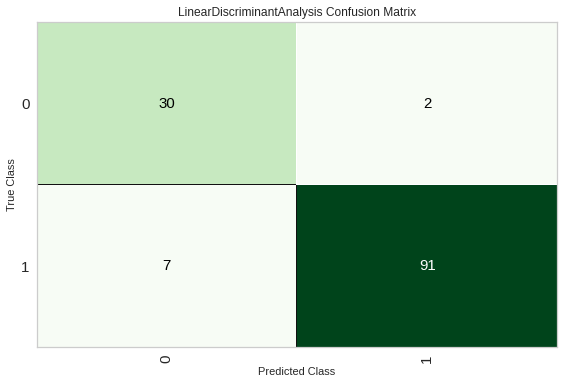

In [ ]:
#Matriz de Confusão
plot_model(tuned, plot='confusion_matrix')

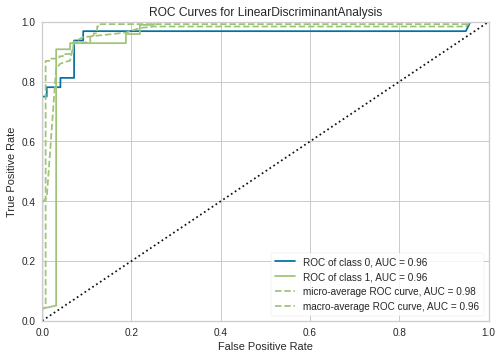

In [ ]:
#Analisando modelos e métricas - Curva ROC
plot_model(tuned, plot='auc')

In [ ]:
final_model = finalize_model(tuned)

##Regressão LOGÍSTICA (scikit learn)


A variável target: `aprovado` (1 ou 0)

In [ ]:
#não utilizaremos a variável média para a regressão logística
df_RL = df_ohe.drop('media', 1)

df_RL['aprovado'].value_counts(normalize=True)

1    0.758089
0    0.241911
Name: aprovado, dtype: float64

A base apresenta um percentual de 75,8% de aprovados e 24,2% de não aprovados 

In [ ]:
#dropar a variavel target
#X_RL = df_RL.drop('aprovado', 1)

#Por meio da analise exploratoria, escolheremos as variáveis de 
#melhor correlação com a variável resposta
X_RL = df_RL[
    ['age',
     'Medu',
     'Fedu',
     'studytime',
     'traveltime',
     'failures',
     'famrel',
     'freetime',
     'goout',
     'Dalc',
     'Walc',
     'health',
     'absences',
     'G3'
     ]
]

y_RL = df_RL['aprovado']

In [ ]:
#separar entre treino e teste
X_train_RL, X_test_RL, y_train_RL, y_test_RL = train_test_split(X_RL, y_RL, random_state = 1)

In [ ]:
#normalização dos dados
scaler = StandardScaler()

X_train_RL_normalizado = scaler.fit_transform(X_train_RL)
X_test_RL_normalizado  = scaler.transform(X_test_RL)

In [ ]:
#treinando o modelo
reg_log = LogisticRegression()
reg_log.fit(X_train_RL_normalizado, y_train_RL)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Intercepto: ",reg_log.intercept_)
print("Coeficientes: \n",reg_log.coef_)

Intercepto:  [3.46873141]
Coeficientes: 
 [[-0.15932486  0.1931894   0.19214224  0.20536058 -0.08752909 -0.25682351
  -0.04075136 -0.09244977  0.57527177 -0.02873631 -0.19386714 -0.03356274
   0.04549122  5.33811725]]


In [ ]:
#predict e proba
y_predict_RL = reg_log.predict(X_test_RL_normalizado)
y_proba_RL   = reg_log.predict_proba(X_test_RL_normalizado)[:,1]

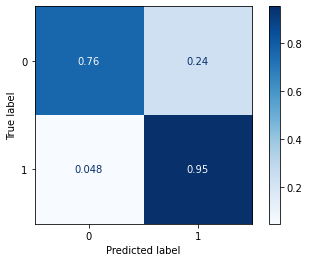

In [ ]:
#matriz de confusao
matriz_confusao = metrics.confusion_matrix(y_test_RL, y_predict_RL)

#plotando a matriz de confusão
metrics.plot_confusion_matrix(
    estimator = reg_log, 
    X = X_test_RL_normalizado, #previsto
    y_true = y_test_RL, #real
    cmap = 'Blues', 
    normalize = 'true'
);

**Análise da Matriz**

True positive (TP) : significa uma classificação correta da classe positive.

True negative (TN) : significa uma classificação correta da classe negative

False positive (FP) : significa uma classificação errada da classe positive

False negative (FN) : significa uma classificação errada da classe negative


In [ ]:
TP = matriz_confusao[1][1]
TN = matriz_confusao[0][0]
FP = matriz_confusao[0][1]
FN = matriz_confusao[1][0]

print('True Positive: ', TP)
print('True Negative: ', TN)
print('False Positive: ', FP)
print('False Negative: ', FN)

True Positive:  119
True Negative:  29
False Positive:  9
False Negative:  6


In [ ]:
#Cálculo da Acurácia - Quantas instâncias o modelo classificou corretamente?
acuracia = (TP+TN) / (TP+FP+TN+FN)
print("Acurácia: ",round(acuracia*100),"%")

#Cálculo da Especificidade - O quão bom é o modelo em evitar falsos positivos?
especificidade = TN / (TN + FP)
print("Especificidade: ",round(especificidade*100),"%")

#Cálculo da Sensibilidade/Recall - Com qual frequência o modelo encontrou positivos?
sensibilidade = TP / (TP + FN)
print("Sensibilidade: ",round(sensibilidade*100),"%")


Especificidade:  76 %
Sensibilidade:  95 %
Acurácia:  91 %


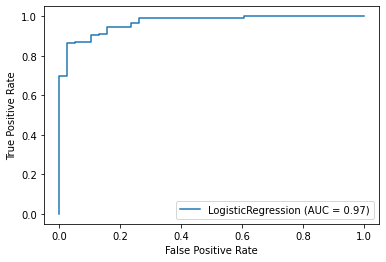

In [ ]:
#Curva ROC
metrics.plot_roc_curve(X = X_test_RL_normalizado, y = y_test_RL, estimator=reg_log)